# Assignment 1 in Deep Learning course

In [4]:
from keras.datasets import cifar100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import KFold
%matplotlib inline

In [109]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [5]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

## Q1 

### a.What is the size of the data ?

In [10]:
#train
len(x_train)

50000

In [11]:
#test
len(x_test)

10000

`Size of data is : 50000 samples in train and 10000 in test.`

### b.What data does each sample contain? (dimensions, channels, how many classes ) ? 

In [90]:
#sample shape 
dim = x_train[0].shape
# data set size
data_set_size = len(set.union(*map(set,y_train)))
data_set_size
print("The sample dimensions is: " + str(x_train[0].shape[0])+ " X " + str(x_train[0].shape[1]))
print("Number of channesls is: "+str(x_train[0].shape[2]))

The sample dimensions is: 32 X 32
Number of channesls is: 3


### Should we preprocess the data? Or is it ready for use?


Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).</br>
The images come in color, so we need to convert them to grayscale</br>
May need to create map of image and label


Can we use augmentation and what kind of augmentation would be valid?

https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10- 

Is the data balanced? yes</br>
(How many examples there are per class?)

In [91]:
classes_count_map = {}
for item in y_train:
    if item[0] in classes_count_map:
        classes_count_map[item[0]] = classes_count_map[item[0]] + 1
    else:
        classes_count_map[item[0]] = 1

In [92]:
classes_count_map = sorted(classes_count_map.items(), key=operator.itemgetter(0))
classes_count_map

[(0, 500),
 (1, 500),
 (2, 500),
 (3, 500),
 (4, 500),
 (5, 500),
 (6, 500),
 (7, 500),
 (8, 500),
 (9, 500),
 (10, 500),
 (11, 500),
 (12, 500),
 (13, 500),
 (14, 500),
 (15, 500),
 (16, 500),
 (17, 500),
 (18, 500),
 (19, 500),
 (20, 500),
 (21, 500),
 (22, 500),
 (23, 500),
 (24, 500),
 (25, 500),
 (26, 500),
 (27, 500),
 (28, 500),
 (29, 500),
 (30, 500),
 (31, 500),
 (32, 500),
 (33, 500),
 (34, 500),
 (35, 500),
 (36, 500),
 (37, 500),
 (38, 500),
 (39, 500),
 (40, 500),
 (41, 500),
 (42, 500),
 (43, 500),
 (44, 500),
 (45, 500),
 (46, 500),
 (47, 500),
 (48, 500),
 (49, 500),
 (50, 500),
 (51, 500),
 (52, 500),
 (53, 500),
 (54, 500),
 (55, 500),
 (56, 500),
 (57, 500),
 (58, 500),
 (59, 500),
 (60, 500),
 (61, 500),
 (62, 500),
 (63, 500),
 (64, 500),
 (65, 500),
 (66, 500),
 (67, 500),
 (68, 500),
 (69, 500),
 (70, 500),
 (71, 500),
 (72, 500),
 (73, 500),
 (74, 500),
 (75, 500),
 (76, 500),
 (77, 500),
 (78, 500),
 (79, 500),
 (80, 500),
 (81, 500),
 (82, 500),
 (83, 500),
 (

Are there any benchmark results for different methods used on this data?

Show some samples from each label (if there are many categories try and present examples of easily separable ones vs. harder more similar categories)

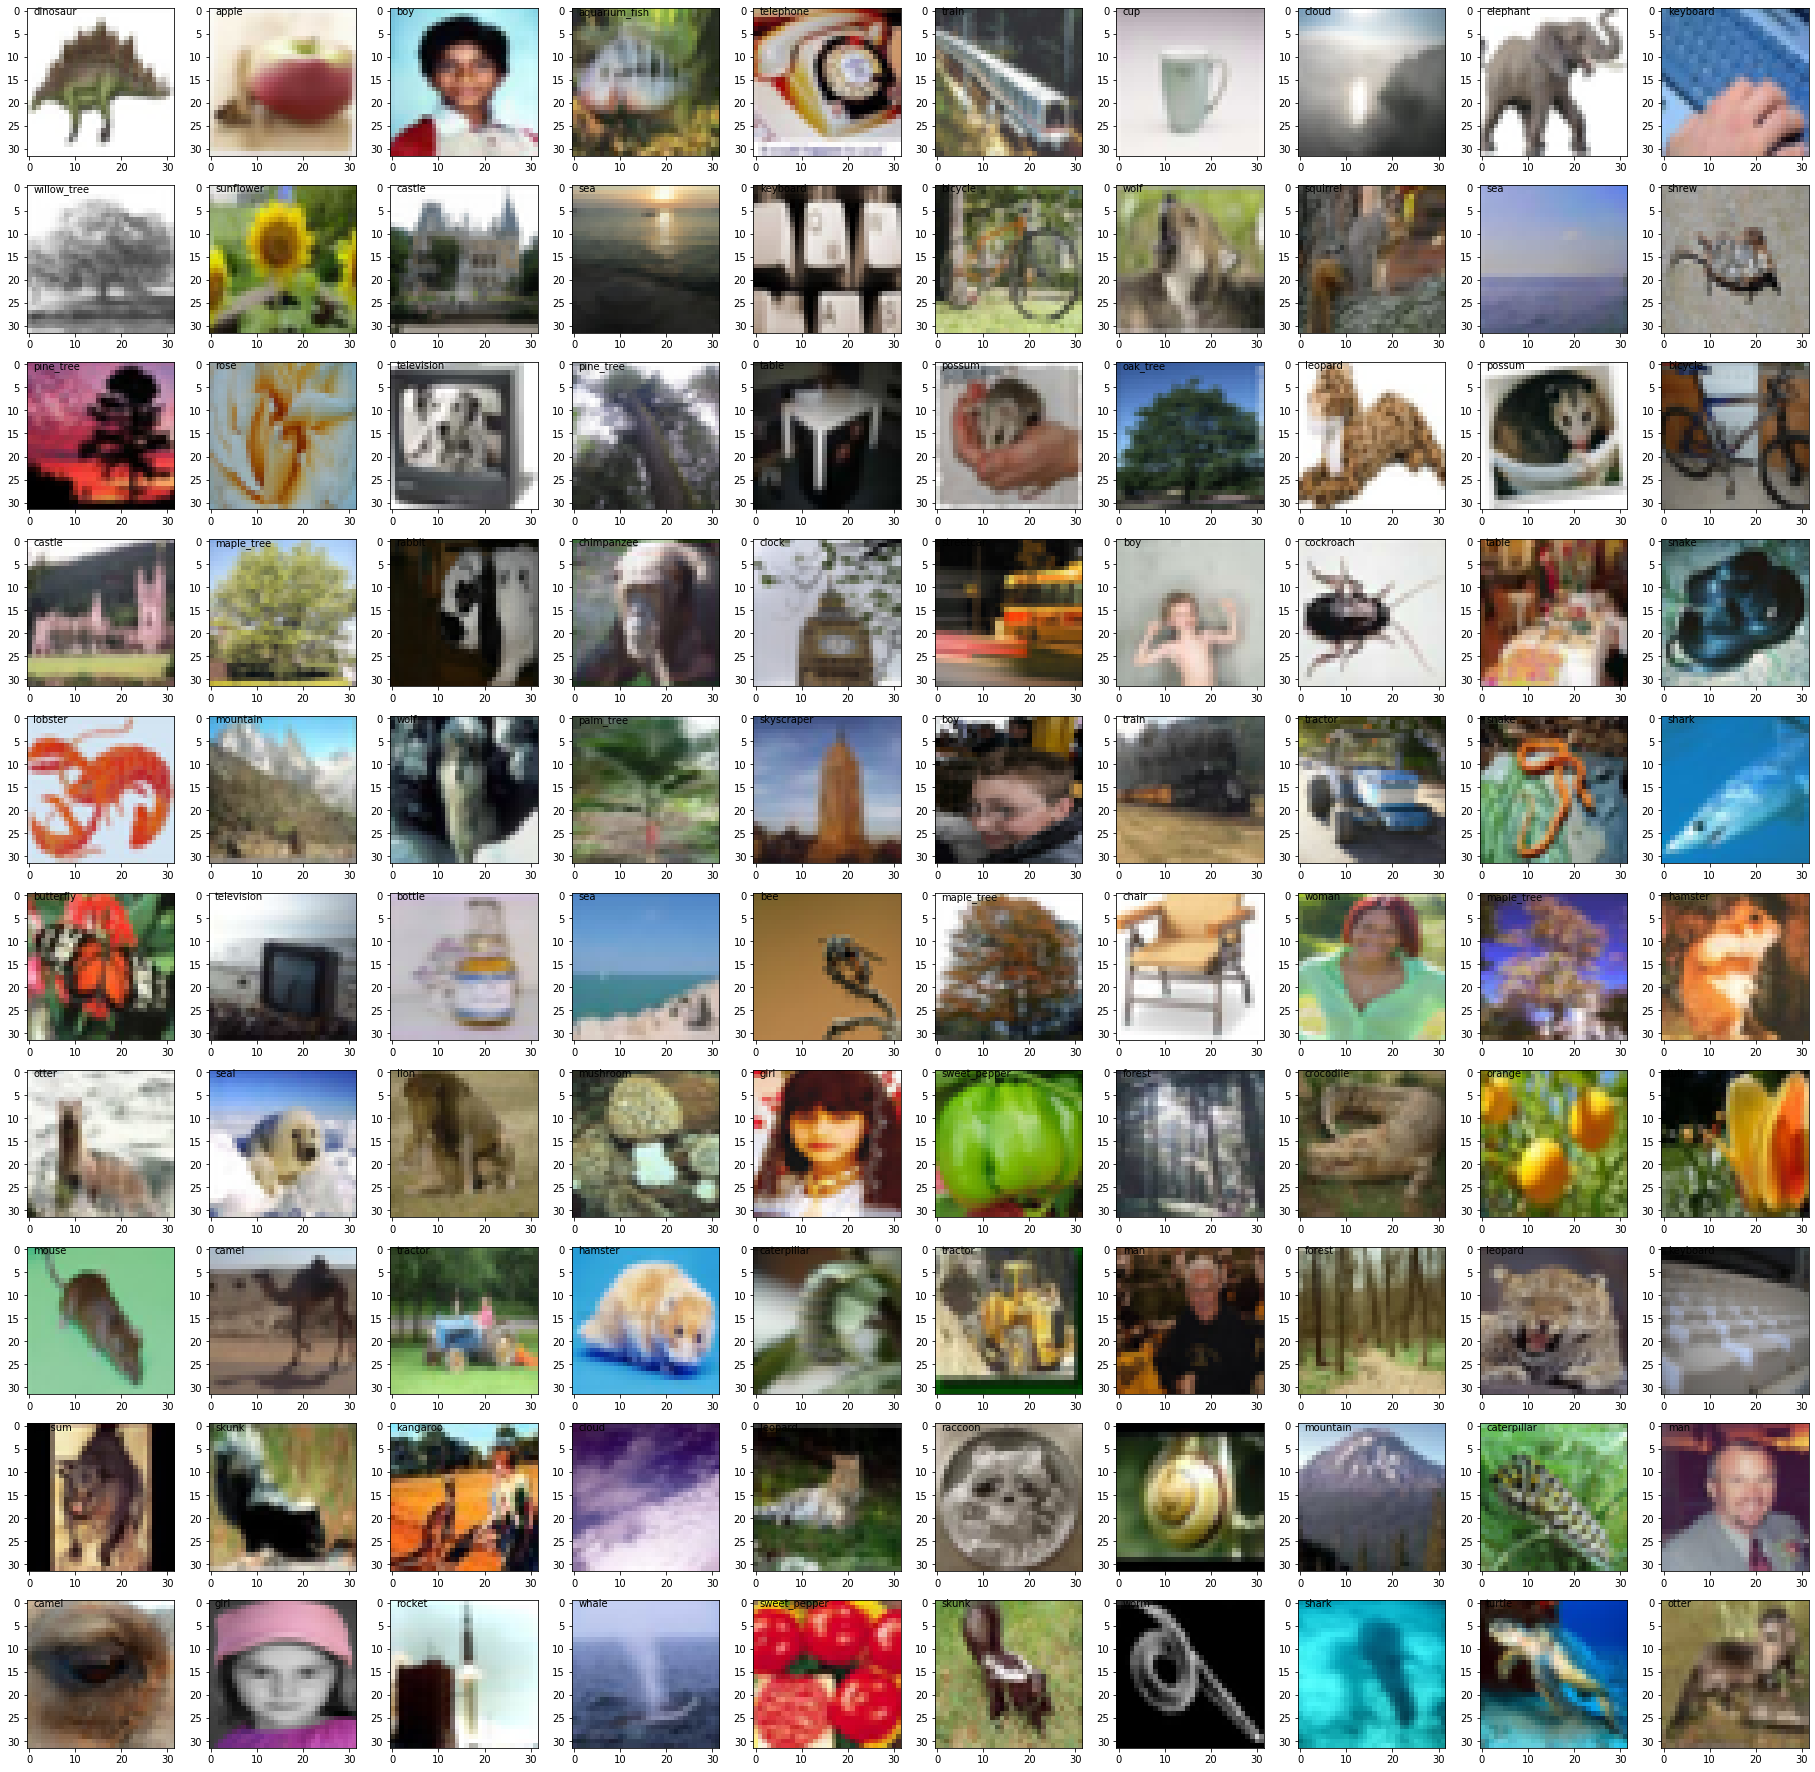

In [111]:
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

w=10
h=10
fig=plt.figure(figsize=(32, 32))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_train[i]
    ax1 = fig.add_subplot(rows, columns, i)
    ax1.annotate(CIFAR100_LABELS_LIST[y_train[i][0]],xy=get_axis_limits(ax1))
    plt.imshow(img)
plt.show()

## Q2

In [6]:
kf = KFold(n_splits=5)
fold = kf.get_n_splits(x_train, y_train)
fold

5